In [73]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint
import json
from scipy.stats import stats

In [2]:
# Read in the east coast GDP CSV
csv_file = pd.read_csv('https://media.githubusercontent.com/media/deirdrebclark/Project1/master/output_data/GDP_East.csv', thousands=',')
east_data = pd.DataFrame(csv_file)
east_data
east_data.columns = ['State', '2014', '2015', '2016', '2017', '2018']

# Sum total of east coast GDP per year
east_sum = east_data.sum()

# Read in the west coast GDP CSV
csv_file = pd.read_csv('https://media.githubusercontent.com/media/deirdrebclark/Project1/master/output_data/GDP_West.csv', thousands=',')
west_data = pd.DataFrame(csv_file)
west_data.columns = ['State', '2014', '2015', '2016', '2017', '2018']

# Sum total of west coast GDP per year
west_sum = west_data.sum()
west_df = pd.DataFrame(west_sum)

# Combine the two into a total GDP summary table
sum_df = pd.DataFrame(east_sum)
sum_df.columns = ['East Coast']
sums_df = sum_df.join(west_df)
sums_df.columns = ['East Coast', 'West Coast']
sums_df = sums_df.T
del sums_df['State']
sums_df

# Transform GDP Summary table for readability
sums_df = sums_df.T
sums_df

,East Coast,West Coast
2014,7.86439e+06,3.15962e+06
2015,8.15827e+06,3.36061e+06
2016,8.36352e+06,3.49941e+06
2017,8.72348e+06,3.71178e+06
2018,9.19033e+06,3.95188e+06


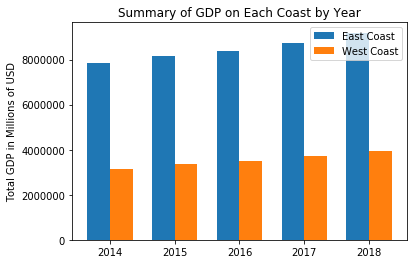

In [89]:
# Summary East v West coast bar plot

labels = ['2014', '2015', '2016', '2017', '2018']

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, sums_df['East Coast'], width, label='East Coast')
rects2 = ax.bar(x + width/2, sums_df['West Coast'], width, label='West Coast')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Total GDP in Millions of USD')
ax.set_title('Summary of GDP on Each Coast by Year')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
plt.savefig('summaryGDP.png')

In [4]:
# Look at pollution data
csv_file = pd.read_csv('https://media.githubusercontent.com/media/deirdrebclark/Project1/master/output_data/Bicoastal_Litter.csv')
litter_df = pd.DataFrame(csv_file)

In [6]:
litter_df
del litter_df['Unnamed: 0']
east_lit = litter_df.loc[litter_df['level_0'] == 'East Coast']
west_lit = litter_df.loc[litter_df['level_0'] == 'West Coast']
west_lit

,level_0,State,Plastic Waste,Foam Waste,Fisherman's Waste,Smoking Waste Items,Misc Food Waste Items,Miscellaneous Waste Items
0,West Coast,"Alaska, USA",17089,17001,4451,11356,10504,13506.0
1,West Coast,"California, USA",1513814,439899,45287,838130,646930,463359.0
2,West Coast,"Hawaii, USA",162594,27640,22564,92206,44719,46293.0
3,West Coast,"Oregon, USA",109147,23946,4098,29913,18316,14395.0
4,West Coast,"Washington, USA",98557,40371,10013,67107,40412,41235.0


In [60]:
east_data
east_lit['State'] = ['AL', 'CT', 'DE', 'FL', 'GA', 'LA', 'ME', 'MD', 'MA', 'MS', 'NH', 'NJ', 'NY', 'NC', 'RI', 'SC', 'TX', 'VA']
east_lit
east_df = east_data.sort_values('State').copy()
east_litt = east_lit.sort_values('State').copy()

west_data
west_lit['State'] = ['AK', 'CA', 'HI', 'OR', 'WA']
west_lit
west_df = west_data.sort_values('State').copy()
west_litt = west_lit.sort_values('State').copy()

C:\Users\chtho\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\chtho\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [61]:
east_total_litter = pd.DataFrame(east_litt.sum(axis=1))
east_total_litter = east_total_litter.join(east_litt['State'])
east_total_litter.set_index(['State'])
east_total_litter.columns = ['Total Pollution', 'State']

west_total_litter = pd.DataFrame(west_litt.sum(axis=1))
west_total_litter = west_total_litter.join(west_litt['State'])
west_total_litter.set_index(['State'])
west_total_litter.columns = ['Total Pollution', 'State']
west_total_litter

,Total Pollution,State
0,73907.0,AK
1,3947419.0,CA
2,396016.0,HI
3,199815.0,OR
4,297695.0,WA


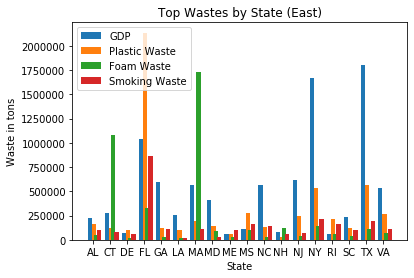

In [90]:
labels = east_df['State']

x = np.arange(len(labels))  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - 3*width/4, east_df['2018'], width, label='GDP')
rects2 = ax.bar(x + width/4, east_litt['Plastic Waste'], width, label='Plastic Waste')
rects3 = ax.bar(x + 3*width/4, east_litt['Foam Waste'], width, label='Foam Waste')
rects3 = ax.bar(x + 6*width/4, east_litt["Smoking Waste Items"], width, label='Smoking Waste')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Waste in tons')
ax.set_xlabel('State')
ax.set_title('Top Wastes by State (East)')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
plt.savefig('3polsVsGDP_east.png')

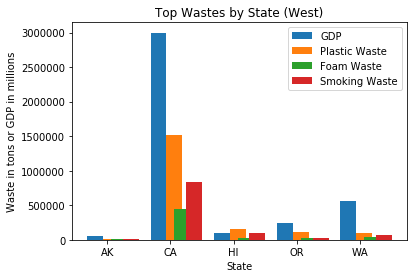

In [91]:
labels = west_df['State']

x = np.arange(len(labels))  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - 3*width/4, west_df['2018'], width, label='GDP')
rects2 = ax.bar(x + width/4, west_litt['Plastic Waste'], width, label='Plastic Waste')
rects3 = ax.bar(x + 3*width/4, west_litt['Foam Waste'], width, label='Foam Waste')
rects3 = ax.bar(x + 6*width/4, west_litt["Smoking Waste Items"], width, label='Smoking Waste')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Waste in tons or GDP in millions')
ax.set_xlabel('State')
ax.set_title('Top Wastes by State (West)')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
plt.savefig('3polsVsGDP_west.png')

In [9]:
# Open coastline CSV
csv_file = pd.read_csv("https://media.githubusercontent.com/media/deirdrebclark/Project1/master/Resources/coastline.csv", thousands=",")
coast_df = pd.DataFrame(csv_file)

# Format the coastline Dataframe
coast_df.columns = ['State', 'Coastline']
coast_df['Coastline'] = coast_df['Coastline'].str.strip(' mi')
coast_df['Coastline'] = coast_df['Coastline'].str.replace(',' , '')
coast_df['Coastline'] = coast_df['Coastline'].astype(int)
coast_df = coast_df.sort_values('State')
coast_df['State'] = ['AL', 'AK', 'CA', 'CT', 'DE', 'FL', 'GA', 'HI', 'LA', 'ME', 'MD', 'MA', 'MS', 'NH', 'NJ', 'NY', 'NC', 'OR', 'RI', 'SC', 'TX', 'VA', 'WA']

In [65]:
east_state = ['AL', 'CT','DE','FL','GA','LA','ME','MD','MA','MS','NH','NJ','NY','NC','RI','SC','TX', 'VA']
east_coast = coast_df[coast_df.State.isin(east_state)]

west_state =  ['AK', 'CA', 'HI', 'OR', 'WA']
west_coast = coast_df[coast_df.State.isin(west_state)]
west_coast

,State,Coastline
0,AK,33904
2,CA,3427
3,HI,1052
7,OR,1410
11,WA,3026


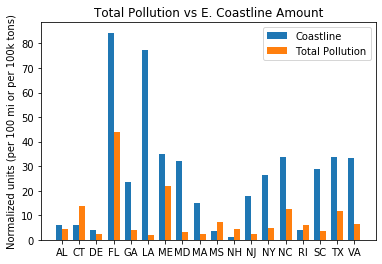

In [92]:
# Barplot for coastline values
labels = east_coast['State']

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, east_coast['Coastline']/100, width, label='Coastline')
rects2 = ax.bar(x + width/2, east_total_litter['Total Pollution']/100000, width, label='Total Pollution')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Normalized units (per 100 mi or per 100k tons)')
ax.set_title('Total Pollution vs E. Coastline Amount')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
plt.savefig('coastline_east.png')

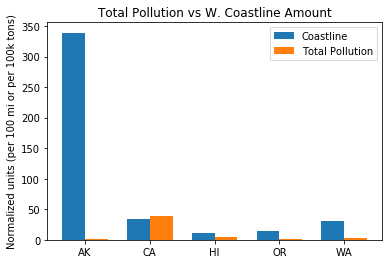

In [70]:
# Barplot for coastline values
labels = west_coast['State']

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, west_coast['Coastline']/100, width, label='Coastline')
rects2 = ax.bar(x + width/2, west_total_litter['Total Pollution']/100000, width, label='Total Pollution')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Normalized units (per 100 mi or per 100k tons)')
ax.set_title('Total Pollution vs W. Coastline Amount')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
plt.savefig('coastline_west.png')

In [88]:
stats.linregress(west_coast['Coastline'], west_total_litter['Total Pollution'])
# rvalue=-0.25912315944531666
stats.linregress(east_coast['Coastline'], east_total_litter['Total Pollution'])
# rvalue=0.5543644933615807
stats.linregress(west_df['2018'], west_total_litter['Total Pollution'])
# rvalue=0.987650265665757 very strong correlation
stats.linregress(east_df['2018'], east_total_litter['Total Pollution'])
# rvalue=0.44829529090626186

stats.ttest_ind(east_total_litter['Total Pollution'], west_total_litter['Total Pollution'])
# pvalue=0.8510624099227789 not different
stats.ttest_ind(east_df['2018'], west_df['2018'])
# pvalue=0.4485761095948283 not different

stats.f_oneway(east_df['2018'], east_coast['Coastline'], east_total_litter['Total Pollution'])
# pvalue=0.0010412292719855817
stats.ttest_ind(east_df['2018'], east_coast['Coastline'])
# pvalue=0.0001969110170277953 significantly different; have nothing to do with one another
stats.f_oneway(west_df['2018'], west_coast['Coastline'], west_total_litter['Total Pollution'])
# pvalue=0.42347054854659516 not significantly different

F_onewayResult(statistic=0.9238457139685516, pvalue=0.42347054854659516)